In [1]:
import pandas as pd
df = pd.DataFrame({
    "A" : ["a", "b", "c", "a", "b"], 
    "B" : [1,2,3,1,0]
})
df

/tmp/ipykernel_17313/2430213789.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["A"])


LabelEncoder()

In [3]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [4]:
df["le_A"] = le.transform(df["A"])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [5]:
le.transform(["a","b"])


array([0, 1])

In [6]:
le.fit_transform(df["A"])


array([0, 1, 2, 0, 1])

In [7]:
le.inverse_transform([1,2,2,2])

array(['b', 'c', 'c', 'c'], dtype=object)

In [8]:
df = pd.DataFrame({
    "A" : [10,20,-10,0,25],
    "B" : [1,2,3,1,0]
})
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [10]:
mms.data_max_, mms.data_min_

(array([25.,  3.]), array([-10.,   0.]))

In [11]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [12]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

In [13]:
mms.fit_transform(df)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [15]:
ss.mean_,ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [16]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [17]:
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [18]:
ss.inverse_transform(df_ss)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

In [19]:
df = pd.DataFrame({
    "A" : [-0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5]
})

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [21]:
df_scaler = df.copy()

In [22]:
df_scaler["MinMax"] = mm.fit_transform(df)
df_scaler["Standard"] = mm.fit_transform(df)
df_scaler["Robust"] = mm.fit_transform(df)


In [23]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,0.000000,0.000000
1,0.0,0.019608,0.019608,0.019608
2,0.1,0.039216,0.039216,0.039216
3,0.2,0.058824,0.058824,0.058824
4,0.3,0.078431,0.078431,0.078431
5,0.4,0.098039,0.098039,0.098039
6,1.0,0.215686,0.215686,0.215686
7,1.1,0.235294,0.235294,0.235294
8,5.0,1.000000,1.000000,1.000000


<Axes: >

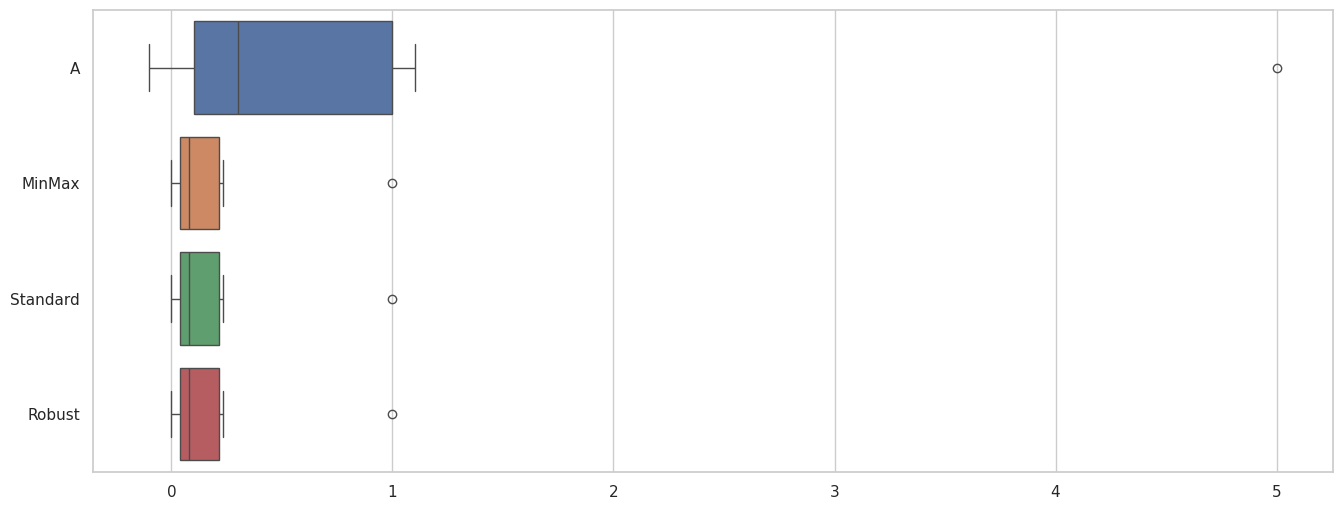

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16,6))
sns.boxplot(data=df_scaler, orient="h")